# 1. 워드 임베딩(Word Embedding)
* 단어를 컴퓨터가 이해하고, 효율적으로 처리할 수 있도록 단어를 벡터화하는 기술
* 단어를 밀집 벡터의 형태로 표현하는 방법
  * dense vector라고 한다.
* 워드 임베딩 과정을 통해 나온 결과를 임베딩 벡터라고 한다.
* 워드 임베딩을 거쳐 잘 표현된 단어 벡터들을 계산이 가능하며, 모델에 입력으로 사용할 수 있다.

### 1-1. 인코딩(Encoding)
* 기계는 자연어를 이해할 수 없기 때문에 데이터를 기계가 이해할 수 있도록 숫자등으로 변환해 주는 작업
* 자연어 처리에서 인코딩은 자연어를 수치화된 벡터로 변환하는 작업

### 1-2. 희소 표현(Sparse Representation)
* 원 핫 인코딩을 통해 나온 원 핫 벡터들은 표현하고자 하는 단어의 인덱스의 값만 1이고, 나머지 인덱스에는 전부 0으로 표현되는 벡터 표현 방법
* 원 핫 인코딩에 의해 만들어지는 벡터를 희소 벡터라고 한다.
* 수동으로 표현을 한다.

### 1-3. 희소 벡터의 문제점
* 희소 벡터의 특징은 단어의 개수가 늘어나면 벡터의 차원이 한없이 커진다.
* 원 핫 벡터는 벡터 표현 방식이 매우 단순하여 단순히 단어의 출현 여부만을 벡터에 표시할 수 없다.
* 희소 벡터를 이용하여 문장 혹은 텍스트간 유사도를 계산해 보면 원하는 유사도를 얻기 힘들다


### 1-4. 밀집 표현(Dense Representation)
* 벡터의 차원이 조밀해졌다는 의미
* 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞추는 표현 방식
* 자연어를 밀집 표현으로 변환하는 인코딩 과정에서 0과 1의 binary 값이 아니라 연속적인 실수의 값을 가질 수 있다.
* 학습 코퍼스를 통해서 학습을 한다.
  * 딥러닝 학습처럼 학습한다.


### 1-5. 밀집 표현의 장점
* 적은 차원으로 대상을 표현할 수 있다.
  * 실수로 표현하기 때문에 함축적이고 공간을 효율적으로 사용할 수 있다.
  * 단어의 개수와 상관없이 사용자가 설정한 차원 값을 설정하기 때문이다.
* 더 큰 일반화 능력을 가지고 있다.


### 1-6. 원 핫 벡터와 워드 임베드의 차이
|     | 원-핫 벡터 | 워드 임베딩        |
| --- | --------- | ----------------- |
| 차원  | 고차원(단어 집합의 크기) | 저차원으로 표현 |
| 종류 | 희소 벡터 | 밀집 벡터 |
| 표현방법 | 수동 | 커퍼스에서 학습 |
| 값의 유형 | 0, 1 | 실수 |

### 1-7. 차원 축소(Demensionality Reduction)
* 희소 벡터를 밀집 벡터의 형태로 변환하는 방법
* 머신러닝에서 많은 피처들로 구성된 고차원의 데이터에서 중요한 피처들만 뽑아 저차원의 데이터(행렬)로 변환하기 위해 사용
  * PCA(Principal Component Analysis)
  * 잠재 의미 분석(Latent Semantic Analysis)
  * 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)
  * SVD(Singular Value Decomposition)

# 2. Word2Vec

### 2-1. 분산 표현(Distributed Representation)
* 분포 가설이라는 가정 하에 만들어진 표현 방법
* 분포 가설: "비슷한 문맥에서 등장하는 단어들은 비슷한 의미를 가진다"는 가설
* 분포 가설의 목표는 단어 주변의 단어들, window 크기에 따라 정의되는 문맥의 의미를 이용해 단어를 벡터로 표현(분산 표현)하는 것
* 분산 표현으로 표현된 벡터들은 원 핫 벡터처럼 차원이 단어 집합의 크기일 필요가 없으므로, 벡터의 차원이 상대적으로 저차원으로 줄어든다.
* 밀집 표현을 분산 표현이라 부르기도 한다.
* 희소 표현에서는 각각의 차원이 각각의 독립적인 정보를 가지고 있지만, 밀집에서는 하나의 차원이 여러 속성들이 버무려진 정보를 가지고 있다.
* 밀집 표현을 이용한 대표적인 학습 방법이 Word2Vec이다.

### 2-2. Word2Vec이란?
* 분포 가설 하에 표현한 분산 표현을 따르는 워드 임베딩 모델
* Google이 2013년도에 처음으로 공개하였다.
* 중심 단어와 주변의 단어들을 사용하여 단어를 예측하는 방식으로 Embedding한다.
* Word2Vec의 학습 방식에는 두가지 방식이 있다.
  * CBOW(Continuous Bag Of Words)
  * Skip-Gram


### 2-3. CBOW(Continuous Bag Of Words)
* 주변에 있는 단어들을 보고 중간에 있는 단어를 예측하는 방법을 말한다.
  * ex) 나는 저녁으로 _____ 먹었다.
  * 예시에서 주변의 저녁으로와 먹었다를 보고 가운데의 빈칸에 들어갈 단어를 예측한다.
  * 이 때 빈칸을 타겟 단어라고 한다.
* 주변 단어(Context)는 타겟 단어(Target Word)의 직전 n개 단어와 직후 n개의 단어를 의미하며, 이 범위를 Window라 부르고, n을 window size라고 한다.
  * ex) '작고 귀여운 강아지가 문 앞에 앉아 있다.'
  * '강아지가'를 target word라 하고, window size를 2라고 할 경
  * 작고, 귀여운, 문, 앞에가 해당하고 이 단어들을 통해 '강아지가'를 예측한다.
* Sliding Window
  * 문장 하나에 대해 한번만 학습을 진행하는 것은 아깝기 때문에 Sliding window 방식을 사용하여 하나의 문장을 가지고 여러 개의 학습 데이터셋을 생성한다.
  
  <img src="https://wikidocs.net/images/page/22660/%EB%8B%A8%EC%96%B4.PNG">

* [참고 사이트](https://wikidocs.net/22660)

* Word2Vec은 최초 입력으로 one-hot vector를 받는데 1 * V 크기의 one-hot-vector의 각 요소와 hidden layer N개의 각 노드는 1대 1 대응이 이루어져야 하므로 가중치 행렬 W의 크기는 V * N이 된다
* 학습 코퍼스의 단어가 10000개가 있고 hidden layer의 노드를 300개로 지정할 경우 가중치 행렬 W는 10000 * 300 행렬 형태가 된다.
* 각각의 가중치 행렬은 random 한 값으로 초기화 되어 있고, 학습 시 target word를 맞추는 과정에서 W가 계속해서 조정이 된다.
* 예를 들어 4개의 단어들이 target word 예측에 사용될 때 각각의 단어들에 해당하는 W의 임배딩 벡터들 4개의 평균을 사용한다.

--------------------------------


<img src="https://wikidocs.net/images/page/22660/word2vec_renew_5.PNG">

* 평균 벡터는 두 번째 가중치 행렬 W와 곱해지며 곱해진 결과로는 target word의 원 핫 벡터와 크기가 동일한 벡터를 얻을 수 있다.
* 최종 출력값 벡터는 다중 클래스 분류 문제를 위한 일종의 Score vector이며 0과 1사이의 값을 가지는데 이는 중심 단어일 확률을 나타낸다.
* 스코어 벡터 값은 정답 레이블에 해당하는 target word의 원-핫 벡터 내의 1의 값에 가까워져야 한다.
* 스코어 벡터와 원-핫 벡터의 오차를 줄이기 위해 손실함수(Cross-Entropy) 함수를 사용한다.


<img src="https://wikidocs.net/images/page/22660/word2vec_renew_1.PNG">

* 입력 단어 벡터(Input Word Vectors = input layer): CBOW 모델에서 주변 문맥의 단어 벡터들을 입력으로 사용합니다. 입력 단어 벡터는 임베딩된 단어의 의미를 나타내며, 모델에 주어진 문맥 정보를 전달합니다.

* 히든 레이어(Hidden Layer = projection layer): CBOW 모델에서 입력 단어 벡터들의 평균을 계산하는 부분입니다. 이 평균 벡터는 문맥 정보를 종합하여 단어 예측에 활용됩니다.

* 출력 단어 벡터(Output Word Vectors = output layer): 예측하고자 하는 단어의 벡터 표현을 생성합니다. 이 벡터는 단어의 의미를 나타내며, 모델이 학습한 단어 임베딩의 일부입니다. 모델이 학습을 통해 생성한 출력 단어 벡터는 다른 단어 벡터와의 유사성을 기반으로 단어 간의 관계를 파악하는 데 사용될 수 있습니다.

<img src='https://wikidocs.net/images/page/22660/word2vec_renew_3.PNG'>

* 입력층과 투사층 사이의 가중치 W는 V × M 행렬이며, 투사층에서 출력층사이의 가중치 W'는 M × V 행렬이다.
  * 그래도 전치행렬이 아니고 전혀 다른 행렬이다.
* 입력 벡터는 원 핫 벡터이다.
* i번째 인덱스에 1이라는 값을 가지고 그 외의 0의 값을 가지는 입력 벡터와 가중치 W 행렬의 곱은 사실 W행렬의 i번째 행을 그대로 읽어오는 것과(lookup) 동일하다.
  * 룩업 테이블(lookup table)이라고 한다.


<img src='https://wikidocs.net/images/page/22660/word2vec_renew_4.PNG'>

* 주변 단어의 원-핫 벡터에 대해서 가중치 W가 곱해서 생겨진 결과 벡터들은 투사층에서 만나 이 벡터들의 평균인 벡터를 구한다.
* CBOW는 입력 벡터가 4개여서 평균을 구해야 하지만 Skip-Gram의 경우 입력값이 중심 단어 한개이기 때문에 평균을 따로 구하지 않는다.


<img src='https://wikidocs.net/images/page/22660/word2vec_renew_5.PNG'>

* CBOW는 소프트맥스(softmax) 함수를 지나면서 벡터의 각 원소들의 값은 0과 1사이의 실수로, 총 합은 1이 된다.
  * 다중 클래스 분류 문제를 위한 일종의 스코어 벡터(score vector)이다.
* 스코어 벡터의 j번째 인덱스가 가진 0과 1사이의 값은 j번째 단어가 중심 단어일 확률을 나타낸다.
* 스코어 벡터의 값은 레이블에 해당하는 벡터인 중심 단어 원-핫 벡터의 값에 가까워져야한다.



### 2-4. skip-gram
* 중심 단어에서 주변 단어를 예측한다.
* 중심 단어를 sliding window 하면서 학습 데이터를 증강시킨다.

<img src='https://wikidocs.net/images/page/22660/skipgram_dataset.PNG'>

<img src='https://wikidocs.net/images/page/22660/word2vec_renew_6.PNG'>

* input layer에 '강아지'가 들어간다면 Output layer에 작고, 귀여운, 문, 앞에가 나오게 된다.
* 여러개 중에서 하나를 출력하는 것이 아니고 그 반대로 하기 때문에 성능이 훨씬 좋다.
* 중심 단어를 가지고 주변단어를 예측하는 방법이기 때문에 projection layer에서 백터들 간의 평균을 구하는 과정이 없다.
  * 대신, output layer를 통해 벡터가 2n개 만큼 나오게 된다.
  * n은 window size를 나타낸다.


### 2-5. CBOW와 Skip-Gram
* Skip-Gram이 CBOW에 비해 여러 문맥을 고려하기 때문에 Skip-Gram의 성능이 일반적으로 더 좋다.
* Skip-Gram이 단어당 학습 횟수가 더 많고 Embedding의 조정 기회가 더 많으므로, 더 정교한 Embedding 학습이 가능하다.

```
작고 귀여운 강아지 문 앞에 앉아 있다.
```

|     | CBOW |  |
| --- | --------- | ----------------- |
| Input  | Output | 학습기회 |
| 귀여운, 강아지 | 작고 | 1 |
| 작고, 강아지, 문 | 귀여운 | 1 |
| 작고, 귀여운, 문, 앞에 | 강아지 | 1 |
| 귀여운, 강아지, 앞에, 앉아 | 문 | 1 |
| 강아지, 문, 앉아, 있다 | 앞에 | 1 |
| 문, 앞에, 있다 | 앉아 | 1 |
| 앞에, 앉아 | 있다 | 1 |



|     | Skip-gram |  |
| --- | --------- | ----------------- |
| Input  | Output | 학습기회 |
| 작고 | 귀여운, 강아지 | 2 |
| 귀여운 | 작고, 강아지, 문 | 3 |
| 강아지 | 작고, 귀여운, 문, 앞에 | 4 |
| 문 | 귀여운, 강아지, 앞에, 앉아 | 4 |
| 앞에 | 강아지, 문, 앉아, 있다 | 4 |
| 앉아 | 문, 앞에, 있다 | 3 |
| 있다 | 앞에, 앉아 | 2 |



#### 2-5-1. CBOW가 더 좋은 경우
* 작은 데이터셋: CBOW 모델은 주변 단어들을 통해 중심 단어를 예측하는 방식이므로, 주변 단어들의 정보를 활용하여 중심 단어를 학습합니다. 작은 데이터셋에서는 CBOW 모델이 일반적으로 더 빠르게 학습하고, 주변 단어의 다양한 정보를 활용하여 좋은 임베딩 결과를 얻을 수 있습니다.

* 자연어 처리 작업에서 문맥의 정확성이 중요한 경우: CBOW 모델은 주어진 문맥 안에서 중심 단어를 예측하기 때문에, 문맥의 정확성이 중요한 작업에서 유용합니다. 예를 들어, 문장 내에서 단어의 의미를 파악하고자 하는 문제나 문맥을 이해하는 작업에서 CBOW 모델을 사용할 수 있습니다.

* 잡음이 적은 데이터셋: CBOW 모델은 주변 단어들을 평균하여 중심 단어를 예측하므로, 잡음이 있는 데이터셋에서 더 안정적인 학습이 가능합니다. Skip-gram 모델은 각각의 주변 단어를 개별적으로 예측하기 때문에 잡음이 있는 데이터셋에서는 CBOW 모델보다 성능이 떨어질 수 있습니다.

#### 2-5-2. Skip-Gram이 더 좋은 경우
* 큰 데이터셋: Skip-gram 모델은 각각의 주변 단어를 개별적으로 예측하는 방식이므로, 데이터셋이 클 경우에도 효과적으로 학습할 수 있습니다.

* 희귀 단어의 임베딩: Skip-gram 모델은 단어 간 유사성을 더 잘 포착할 수 있는데, 특히 희귀 단어의 임베딩을 구하는 데 유용합니다. Skip-gram 모델은 주변 단어들을 개별적으로 예측하면서 희귀 단어와의 관련성을 높일 수 있습니다.

### 2-6. Word2Vec의 한계
* 단어의 형태학적 특성을 반영하지 못함
  * 예) teach, teacher, teachers와 같이 3 단어는 의미적으로 유사한 단어지만 각 단어를 개별 단어로 처리하여 3 단어 모두 벡터 값이 다르게 구성된다.
* 단어 빈도 수의 영향을 많이 받아 희소한 단어를 임베딩하기 어렵다
* OOV(Out Of Vocabulary)의 처리가 어렵다
  * 학습이 안되었기 때문
  * 새로운 단어가 등장할 경우 데이터 전체를 학습 시켜야 한다.
    * 단어 사전의 크기가 클수록 학습하는데 오래 걸린다.
    * 단어 사전의 크기가 수 만개 이상인 경우, Word2Vec은 학습하기에는 무거운 모델이 된다.

### 2-7. Word2Vec의 학습 트릭
* Subsampling Frequent Words
  * 자연어 코퍼스에서 자주 등장하는 단어의 학습량을 확률적인 방법으로 줄이는 것이다.
  * 등장 빈도가 높을 수록 단어가 업데이트 될 기회가 많기 때문
  
 $$ P(w_i) = 1 - \sqrt\frac{t}{f(w_i)}$$
  
  * f(Wi)는 해당 단어가 말뭉치에 등장할 비율(얼마나 많이 나오는가)
    * (해당 단어 빈도 / 전체 단어 수)
  * t 같은 경우는 사용자가 지정해주는 값으로, 연구팀에서는 0.00001을 권장하고 있다.
  * 예) 만약 f(Wi)가 0.01로 나타나는 빈도 높은 단어는 위 식으로 계산한 P(Wi)가 0.9684이므로 100번의 학습 기회 가운데 96번 정도는 학습에서 제외하게 된다.
  * 등장 비율이 적어 P(Wi)가 0에 가깝다면 해당 단어가 나올때마다 빼놓지 않고 학습을 한다.
  * 학습량을 효과적으로 줄여 계산량을 감소시키는 전략


---


* Negative Sampling
  - 학습하는 중심 단어와 주변 단어들 외에, 이 단어들과 별 연관없는 수많은 단어의 임베딩까지 업데이트하는 것은 비효율적이다.
    - 소프트맥스를 적용하려면 분모에 해당하는 값, 즉 중심단어와 나머지 모든 단어의 내적을 한 뒤, 이를 다시 exp를 취해줘야 한다. 보통 전체 단어가 10만개 안팎으로 주어지므로 계산량이 커지게 된다.
  - 무작위로 negative sample들을 선택하여, 하나의 중심 단어에 대해 [주변단어 + 네거티브 샘플들]로만 구성된 작은 단어 집합을 만들어서 학습하면 훨씬 효율적으로 학습할 수 있을 것이다.

  - positive sample은 1로, negative sample은 0으로 간주하는 binary classification 형식의 학습 방법을 사용
  - 모델을 학습할 때 기존의 Skip-gram과 다르게, target words에 대해서 단어 사전의 subset에 대해서만 학습을 진행할 수 있으므로, 효율적으로 학습한다.

  $P(w_i)_n = (\frac{f(w_i)}{ \sum_{j=1}^{n} f(w_i)})^3 / _4$


---
* Subsampling Frequent Words vs Negative Sampling
  * Subsampling Frequent Words는 학습 자체를 스킵하지만 Negative Sampling은 스킵하지 않는다.
  * Subsampling은 빈도가 높은 단어의 가중치를 감소시키는 데 초점을 맞추고, Negative Sampling은 계산 비용을 줄이고 학습 속도를 향상시키는 데 초점을 맞춘다.




# 3. FastText
* 분포 가설 하에 표현한 분산 표현을 따르는 또 다른 임베딩 모델
* 2017년 페이스북에서 공개한 워드 임베딩 기법

### 3-1. FastText 동작 원리
* <, >는 단어의 경계를 나타내기 위한 특수 기호
* 단어를 먼저 <, >로 감싼 후 설정한 n-gram의 값에 따라 앞에서부터 단어를 쪼갠다.
* 마지막에 본 단어를 설명하기 위해서 <, >로 감싸진 전체 단어를 하나 추가한다.
* n-gram을 설정할 때는 최소값과 최댓값을 설정할 수 있다.
---

* n-gram에서 n=3이라고 한다면
* 단어 '대한민국'을 <대한, 대한민, 한민국, 민국>, <대한민국> 으로 쪼갠 후 집어넣는다

* n-gram에서 n=4라고 한다면
<대한민, 대한민국, 한민국> <대한민국> 형식으로 나온다.

* n-gram을 최소값은 3, 최댓값은 4라고 한다면
<대한, 대한민, 한민국, 민국> <대한민, 대한민국, 한민국> <대한민국>이 나오게 된다.

### 3-2. FastText의 장점
* 오타나 모르는 단어에 대한 대응이 좋다.
* 단어 집합 내 빈도수가 적었던 단어에 대한 대응이 좋다.
* 자연어 코퍼스 내 노이즈에 대한 대응이 좋다.

### 과제..
* 임베딩 방법론 중 "GloVe"의 작동 원리에 대해 이해해보기

### GloVe
* 2014년에 나온 임베딩 기법으로 말뭉치 전체의 통계 정보와 임베딩된 단어 벡터 간 유사도를 활용하고자 하는 시도
* 카운트 기반과 예측 기반을 모두 사용하는 방법론으로 2014년에 미국 스탠포드 대학에서 개발한 단어 임베딩 방법론
* 예측 기반의 Word2Vec의 단점을 지적하며 이를 보완한다는 목적으로 나왔고, 실제로도 Word2Vec만큼이나 뛰어난 성능을 보여준다


---
* Word2Vec은 예측 기반으로 단어 간 유추 작업에는 LSA보다 뛰어나지만, 임베딩 벡터가 윈도우 크기내에서만 주변 단어를 고려하기 때문에 코퍼스의 전체적인 통계 정보를 반영하지 못한다
* LSA는 카운트 기반으로 코퍼스의 전체적인 통계 정보를 고려하기는 하지만, 왕:남자 = 여왕:? (정답은 여자)와 같은 단어 의미의 유추 작업(Analogy task)에는 성능이 떨어진다
* GloVe는 이러한 기존 방법론들의 각각의 한계를 지적하며, LSA의 메커니즘이었던 카운트 기반의 방법과 Word2Vec의 메커니즘이었던 예측 기반의 방법론 두 가지를 모두 사용한다.


# 4. 워드 임베딩 구축하기

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups

In [2]:
dataset = fetch_20newsgroups(shuffle=True, random_state=10, remove=('headers', 'footers', 'quotes'))

In [3]:
dataset

{'data': ['Someone in Canada asked me to send him some public domain DES file\nencryption code I have.  Is it legal for me to send it?\n\nThanx.\n--\nEschew Obfuscation\n\nRob deFriesse                    Mail:  rj@ri.cadre.com\nCadre Technologies Inc.          Phone:  (401) 351-5950\n222 Richmond St.                 Fax:    (401) 351-7380\nProvidence, RI  02903',
  "\n\nI see . . . you're not running Ultrix!\n\n\t:-)\n\n\t\t\t\t- - Steve\n\n",
  '\nFor the first Move incident (no bomb, several members killed in\ngunfire, circa 1978) the mayor was the very white Frank Rizzo.  \nFor the second (bomb included) the mayor was Wilson Goode, who \nis indeed black.',
  "Okay, I'm trying to install NCSA telnet on a couple (okay, a whole bunch)\nof machines.  They're all true blue IBMs with either Fallon Phonenet cards\nor Dastar cards.  (I belive those names are correct.)  Well, the docs for\ntelnet say that it'll run over an AppleTalk driver, but I've had little\nsuccess.\n\nIf anyone has suc

In [4]:
dataset = dataset.data

In [5]:
dataset[0]

'Someone in Canada asked me to send him some public domain DES file\nencryption code I have.  Is it legal for me to send it?\n\nThanx.\n--\nEschew Obfuscation\n\nRob deFriesse                    Mail:  rj@ri.cadre.com\nCadre Technologies Inc.          Phone:  (401) 351-5950\n222 Richmond St.                 Fax:    (401) 351-7380\nProvidence, RI  02903'

In [6]:
# 데이터셋의 총 개수
len(dataset)

11314

In [7]:
# document 필드를 가진 dataframe으로 변경
new_df = pd.DataFrame({'document':dataset})
new_df

,document
0,Someone in Canada asked me to send him some pu...
1,\n\nI see . . . you're not running Ultrix!\n\n...
2,"\nFor the first Move incident (no bomb, severa..."
3,"Okay, I'm trying to install NCSA telnet on a c..."
4,Hi everyone. I recently posted about how I rec...
...,...
11309,We have a minivas-2 and we want to record to a...
11310,Videonics Title maker System\n================...
11311,"\n\nAnas, of course ! The YAHUD needed blood f..."
11312,From: push@media.mit.edu (Pushpinder Singh)\nS...


In [8]:
# 데이터프레임에서 결측치가 있는지 확인
new_df.replace('', float('NaN'), inplace=True)
# new_df.isna().sum()
print(new_df.isnull().values.any())

True


In [9]:
new_df

,document
0,Someone in Canada asked me to send him some pu...
1,\n\nI see . . . you're not running Ultrix!\n\n...
2,"\nFor the first Move incident (no bomb, severa..."
3,"Okay, I'm trying to install NCSA telnet on a c..."
4,Hi everyone. I recently posted about how I rec...
...,...
11309,We have a minivas-2 and we want to record to a...
11310,Videonics Title maker System\n================...
11311,"\n\nAnas, of course ! The YAHUD needed blood f..."
11312,From: push@media.mit.edu (Pushpinder Singh)\nS...


In [10]:
new_df = new_df.dropna().reset_index(drop=True)
print(f'필터링된 데이터셋 총 개수: {len(new_df)}')

필터링된 데이터셋 총 개수: 11096


In [11]:
# 열을 기준으로 중복된 데이터를 제거
df_unique = new_df.drop_duplicates(['document']).reset_index(drop=True)
print(len(df_unique))

10993


In [12]:
# 데이터셋에 특수문자를 제거
df_unique['document'] = df_unique['document'].str.replace('[^a-zA-Z]', ' ')
df_unique

<ipython-input-12-a66093e6a7cf>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_unique['document'] = df_unique['document'].str.replace('[^a-zA-Z]', ' ')


,document
0,Someone in Canada asked me to send him some pu...
1,I see you re not running Ultrix ...
2,For the first Move incident no bomb several...
3,Okay I m trying to install NCSA telnet on a c...
4,Hi everyone I recently posted about how I rec...
...,...
10988,We have a minivas and we want to record to a...
10989,Videonics Title maker System ...
10990,Anas of course The YAHUD needed blood for...
10991,From push media mit edu Pushpinder Singh Su...


In [13]:
# 데이터셋에 길이가 너무 짧은 단어를 제거(단어의 길이가 2 이하인 경우)
df_unique['document'] = df_unique['document'].apply(lambda x: ' '.join([token for token in x.split() if len(token) > 2]))
df_unique

,document
0,Someone Canada asked send him some public doma...
1,see you not running Ultrix Steve
2,For the first Move incident bomb several membe...
3,Okay trying install NCSA telnet couple okay wh...
4,everyone recently posted about how received ba...
...,...
10988,have minivas and want record Abekas have most ...
10989,Videonics Title maker System about monthes old...
10990,Anas course The YAHUD needed blood for the mat...
10991,From push media mit edu Pushpinder Singh Subje...


In [14]:
# 전체 길이가 200보다 크고 전체 단어의 개수가 5개 이하인 단어를 필터링
df_unique = df_unique[df_unique.document.apply(lambda x: len(str(x)) > 200 and len(str(x).split()) > 5)].reset_index(drop=True)
df_unique

,document
0,Okay trying install NCSA telnet couple okay wh...
1,everyone recently posted about how received ba...
2,one should EVER rely just magazine determine w...
3,Rick Anderson replied letter with article ELp ...
4,Description External Tank option for SSF redes...
...,...
8194,loved Dan Kelly was USA when first got hooked ...
8195,have minivas and want record Abekas have most ...
8196,Videonics Title maker System about monthes old...
8197,Anas course The YAHUD needed blood for the mat...


In [15]:
# 전체 단어에 대한 소문자 변환
df_unique['document'] = df_unique['document'].apply(lambda x: x.lower())
df_unique

,document
0,okay trying install ncsa telnet couple okay wh...
1,everyone recently posted about how received ba...
2,one should ever rely just magazine determine w...
3,rick anderson replied letter with article elp ...
4,description external tank option for ssf redes...
...,...
8194,loved dan kelly was usa when first got hooked ...
8195,have minivas and want record abekas have most ...
8196,videonics title maker system about monthes old...
8197,anas course the yahud needed blood for the mat...


In [16]:
import nltk
from nltk.corpus import stopwords

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
stop_words = stopwords.words('english')

print(len(stop_words))
print(stop_words[:10])

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [19]:
# 데이터셋의 불용어를 제외하여 띄어쓰기 단위로 문장을 분리하기
# df_unique['document'] = df_unique['document'].apply(lambda x: [word for word in x.split() if word.lower() not in stop_words])
tokenized_doc = df_unique['document'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [s_word for s_word in x if s_word not in stop_words])
tokenized_doc

0       [okay, trying, install, ncsa, telnet, couple, ...
1       [everyone, recently, posted, received, bad, vr...
2       [one, ever, rely, magazine, determine, car, bu...
3       [rick, anderson, replied, letter, article, elp...
4       [description, external, tank, option, ssf, red...
                              ...                        
8194    [loved, dan, kelly, usa, first, got, hooked, h...
8195    [minivas, want, record, abekas, functions, wor...
8196    [videonics, title, maker, system, monthes, old...
8197    [anas, course, yahud, needed, blood, matza, pa...
8198    [push, media, mit, edu, pushpinder, singh, sub...
Name: document, Length: 8199, dtype: object

In [20]:
tokenized_doc = tokenized_doc.to_list()
print(len(tokenized_doc))

8199


In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [22]:
tokenizer = Tokenizer()

In [23]:
tokenizer.fit_on_texts(tokenized_doc)

In [24]:
word2idx = tokenizer.word_index

In [25]:
idx2word = {value: key for key, value in word2idx.items()}

In [26]:
encoded = tokenizer.texts_to_sequences(tokenized_doc)

In [27]:
vocab_size = len(word2idx) + 1
print(f'단어 사전의 크기: {vocab_size}')

단어 사전의 크기: 70992


In [28]:
print(encoded[0])

[1591, 194, 1431, 5766, 4027, 424, 1591, 250, 1459, 693, 107, 1073, 22061, 120, 37008, 27005, 658, 37009, 658, 14848, 1034, 411, 13, 3614, 4027, 29, 115, 7777, 458, 97, 1703, 42, 14849, 791, 4027, 7777, 5, 72, 3248, 32, 4027, 911, 50, 673, 393, 76, 137, 95, 7202, 7202, 27006, 151, 314, 11552, 18821, 1592, 111, 205]


In [29]:
# negative sampling을 위해 keras에서 제공하는 전처리 도구인 skipgrams를 사용한다.
from tensorflow.keras.preprocessing.sequence import skipgrams

In [30]:
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:5]]
# vocabulary_size는 negative_sampling을 진행할 개수를 넣을 수 있다.

print(f'전체 샘플 수 : {len(skip_grams)}')

전체 샘플 수 : 5


In [31]:
# skip_grams[0]에 skipgrams로 형성된 데이터 셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]
print(f'3pairs : {pairs[:3]}')
print(f'3labels : {labels[:3]}')

3pairs : [[314, 4370], [4027, 19536], [111, 12853]]
3labels : [0, 0, 0]


In [32]:
# 첫번째 뉴스그룹 샘플에 대해 생긴 pairs와 labels의 개수
print(len(pairs))
print(len(labels))

2100
2100


In [33]:
for i in range(5):
  print('({:s} ({:d}) {:s} ({:d}) -> {:d})'.format(
      idx2word[pairs[i][0]], pairs[i][0],
      idx2word[pairs[i][1]], pairs[i][1],
      labels[i]
  ))

# 결과가 0일 때 => 관계가 없다.
# 결과가 1일 때 => 관계가 있다.

(science (314) arf (4370) -> 0)
(telnet (4027) edged (19536) -> 0)
(state (111) addicts (12853) -> 0)
(correct (411) dastar (37009) -> 1)
(help (72) pxu (44748) -> 0)


In [34]:
training_dataset = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:5000]]

print(training_dataset[0])

([[4027, 3119], [29, 62182], [13, 48631], [95, 151], [314, 111], [7202, 65341], [458, 14849], [693, 69510], [50, 673], [5766, 250], [1431, 2220], [4027, 911], [1703, 42], [911, 19480], [42, 13581], [4027, 14849], [72, 7777], [7202, 57209], [107, 23834], [1703, 32], [1703, 13597], [791, 4027], [1459, 37009], [13, 50577], [14848, 7777], [137, 30889], [7202, 911], [658, 693], [42, 7777], [1591, 658], [7777, 14849], [693, 2742], [50, 50558], [95, 7202], [32, 27268], [658, 22061], [76, 37303], [693, 658], [13, 658], [13, 37009], [1591, 25312], [14848, 97], [72, 791], [27006, 29486], [37008, 4027], [1073, 7460], [658, 4027], [37009, 115], [194, 39516], [14848, 47131], [3248, 76], [115, 37009], [4027, 458], [911, 32608], [7202, 69838], [42, 13], [791, 62493], [791, 994], [32, 51610], [115, 2130], [14849, 48712], [393, 3248], [115, 1703], [205, 511], [50, 3248], [7777, 62788], [5, 76], [13, 2773], [658, 58957], [250, 27005], [693, 37008], [107, 5766], [1591, 27005], [7777, 32662], [97, 1703], 

In [35]:
print(len(training_dataset))

5000


In [36]:
# word embedding 구축
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dot
from tensorflow.keras.utils import plot_model

In [37]:
embedding_dim = 100 # weight를 100으로 준다.

# 중심 단어를 위한 Embedding table
w_inputs = Input(shape=(1,), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

# 주변 단어를 위한 Embedding table
c_inputs = Input(shape=(1,), dtype='int32')
context_embedding = Embedding(vocab_size, embedding_dim)(c_inputs)

In [38]:
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 100)       7099200     ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 100)       7099200     ['input_2[0][0]']                
                                                                                              

In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam')

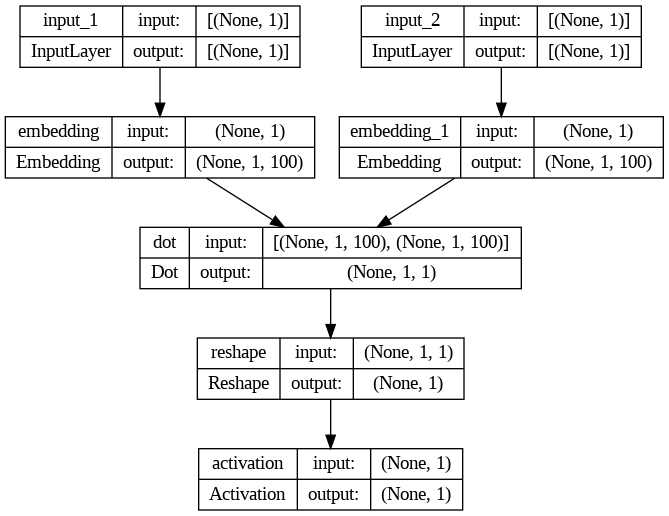

In [40]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [41]:
for epoch in range(100):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X, Y)
    print('Epoch:', epoch+1, 'Loss: ', loss)

Epoch: 1 Loss:  3.465498685836792
Epoch: 2 Loss:  3.4583778381347656
Epoch: 3 Loss:  3.451222538948059
Epoch: 4 Loss:  3.4433964490890503
Epoch: 5 Loss:  3.434612274169922
Epoch: 6 Loss:  3.4245869517326355
Epoch: 7 Loss:  3.413043200969696
Epoch: 8 Loss:  3.399711847305298
Epoch: 9 Loss:  3.384336292743683
Epoch: 10 Loss:  3.36667263507843
Epoch: 11 Loss:  3.346494197845459
Epoch: 12 Loss:  3.3235923647880554
Epoch: 13 Loss:  3.2977811098098755
Epoch: 14 Loss:  3.268899083137512
Epoch: 15 Loss:  3.2368138432502747
Epoch: 16 Loss:  3.2014233469963074
Epoch: 17 Loss:  3.162659525871277
Epoch: 18 Loss:  3.120489537715912
Epoch: 19 Loss:  3.0749165415763855
Epoch: 20 Loss:  3.025980532169342
Epoch: 21 Loss:  2.973758637905121
Epoch: 22 Loss:  2.9183627367019653
Epoch: 23 Loss:  2.8599393367767334
Epoch: 24 Loss:  2.7986671328544617
Epoch: 25 Loss:  2.734754204750061
Epoch: 26 Loss:  2.6684359908103943
Epoch: 27 Loss:  2.5999706983566284
Epoch: 28 Loss:  2.529637038707733
Epoch: 29 Loss:  

In [42]:
for _, elem in enumerate(skip_grams):
  first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
  # second_elem = np.array(elem[1])
  second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
  print(first_elem)
  print(second_elem)
# tuple 형태이기 때문에 zip으로 출력하는 것이 좋다.

[ 314 4027  111 ... 7202  911   42]
[ 4370 19536 12853 ...   205 34424 55039]
[  34   42  430 ...   16 5767   42]
[ 1271 63526 44206 ...   188  1196   128]
[  294 27009   817 ...  1301  1100   153]
[2058 8524   73 ...  911  141    1]
[ 341  147   79 ... 4323 3615 3961]
[22072  1308 54639 ...  4167  4168 67683]
[1917  387  514 ... 1055   82 1055]
[ 1154   152  2005 ...   124 19633 57652]


In [43]:
import gensim

In [44]:
f = open('vectors.txt', 'w')
f.write('{} {}\n'.format(vocab_size-1, embedding_dim))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
  f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [45]:
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [46]:
w2v.most_similar(positive=['apple'])

[('trafficking', 0.4231785535812378),
 ('nutcase', 0.4204108715057373),
 ('primary', 0.41311073303222656),
 ('vica', 0.39825332164764404),
 ('wrenches', 0.3788478672504425),
 ('serge', 0.37839144468307495),
 ('akcesser', 0.3735503852367401),
 ('nobodies', 0.373230516910553),
 ('imensely', 0.3622306287288666),
 ('unconscionable', 0.3600153625011444)]

In [47]:
w2v.most_similar(positive=['doctor'])

[('downshift', 0.4255368411540985),
 ('paradigms', 0.4069041907787323),
 ('scores', 0.40323251485824585),
 ('fcrary', 0.38857075572013855),
 ('easiest', 0.3786807954311371),
 ('koberg', 0.37725377082824707),
 ('vyavasayatmika', 0.3688671290874481),
 ('artillerie', 0.367434561252594),
 ('vaive', 0.3663232624530792),
 ('esas', 0.3642880916595459)]

In [48]:
w2v.most_similar(positive=['engine'])

[('unloaded', 0.3919919729232788),
 ('contacted', 0.3748357892036438),
 ('cheerful', 0.3738166093826294),
 ('cvts', 0.37243255972862244),
 ('mnevz', 0.3665394186973572),
 ('certian', 0.3656977713108063),
 ('gasser', 0.3656916618347168),
 ('comstation', 0.36449334025382996),
 ('cul', 0.3589257299900055),
 ('workings', 0.358677476644516)]

# 과제
* [AI Hub](https://www.aihub.or.kr/)에 공개 되어 있는 한국어 도서 요약 데이터셋을 활용하여 한국어 워드 임베딩 구축해보기